The aim is to predict whether a bank's customers leave the bank or not. If the Client has closed his/her bank account, he/she has left.


**RowNumber**: corresponds to the record (row) number and has no effect on the output.

**CustomerId**: contains random values and has no effect on customer leaving the bank.

**Surname**: the surname of a customer has no impact on their decision to leave the bank.
    
**CreditScore**: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
    
**Geography**: a customer’s location can affect their decision to leave the bank.
    
**Gender**: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
    
**Age**: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
    
**Tenure**: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
    
**Balance**: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
    
**NumOfProducts**: refers to the number of products that a customer has purchased through the bank.
    
**HasCrCard**: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
    
**IsActiveMember**: active customers are less likely to leave the bank.
    
**EstimatedSalary**: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
    
**Exited**: whether or not the customer left the bank. (0=No,1=Yes)

In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.style as style
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.regularizers import l1, l2
import keras_tuner as kt
from keras.optimizers import Adam
from tensorflow.keras import regularizers

from keras_tuner.tuners import BayesianOptimization, Hyperband, RandomSearch

In [163]:
df = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\DEEP LEARNING\Deep Learning project\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Checking for missing values and datatypes

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


*Comment:'RowNumber','CustomerId','Surname' are not needed. No missing values in the dataset.*

In [165]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

In [166]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Checking for categorical variables

In [167]:
df_obj = df.select_dtypes(include='object')
df_obj.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [168]:
df_obj.value_counts()

Geography  Gender
France     Male      2753
           Female    2261
Spain      Male      1388
Germany    Male      1316
           Female    1193
Spain      Female    1089
Name: count, dtype: int64

In [169]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [170]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [171]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], dtype=int, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [172]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [173]:
df = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'Exited']]
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0


#### Imbalance check

In [174]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [175]:
def setup_plot():
    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    plt.xticks(rotation=40)
    plt.gcf().set_size_inches(5, 3)  

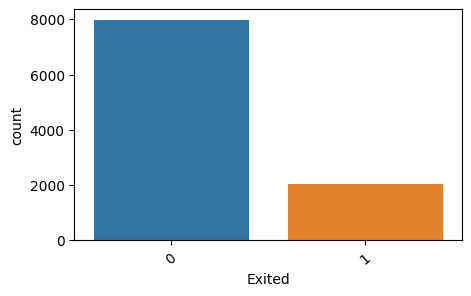

In [176]:
sns.countplot(df, x=df['Exited'])
setup_plot()

In [177]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'Exited'],
      dtype='object')

#### EDA 

In [178]:
figures = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']

C:\Users\lily\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


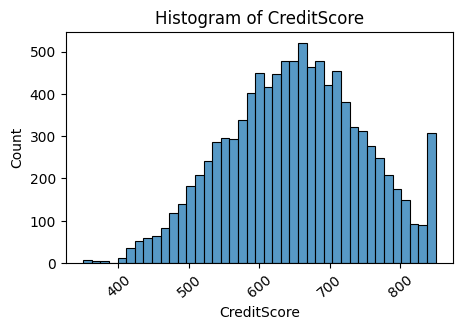

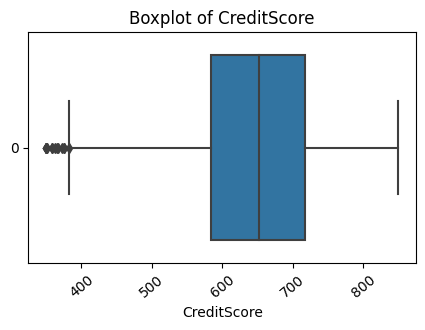

C:\Users\lily\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


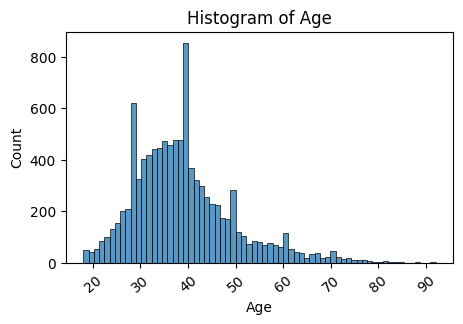

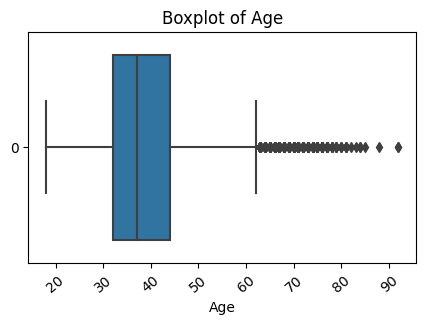

C:\Users\lily\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


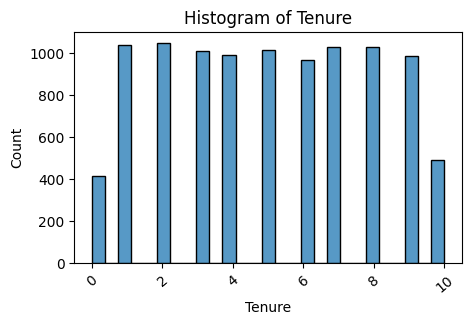

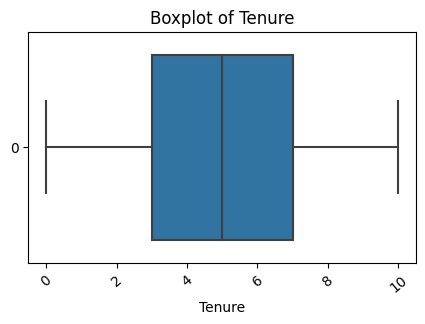

C:\Users\lily\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


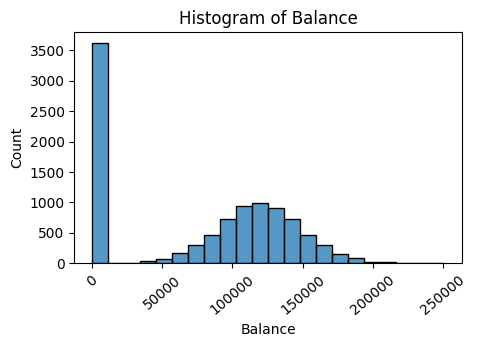

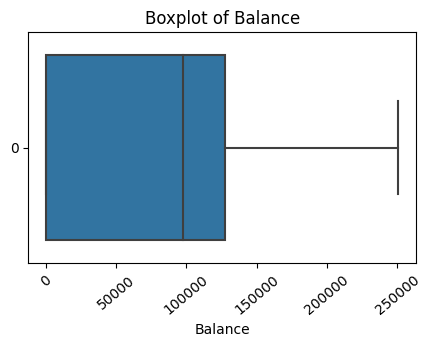

C:\Users\lily\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


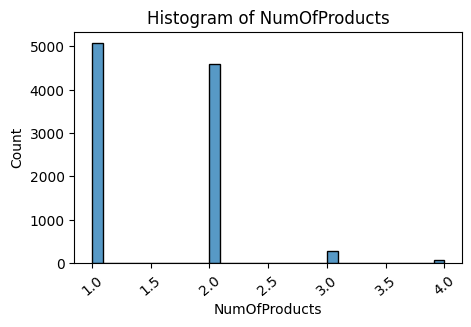

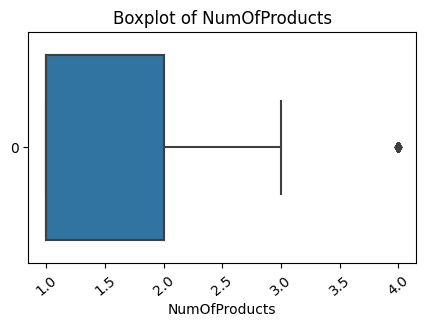

C:\Users\lily\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


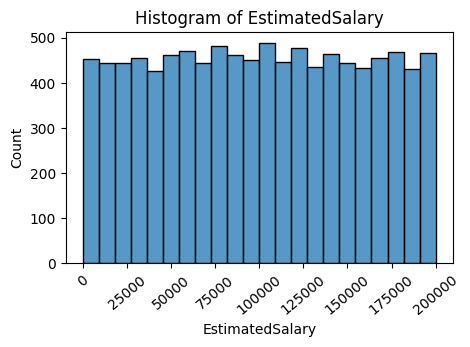

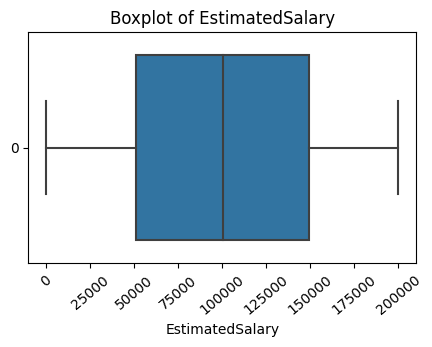

In [179]:
for col in figures:
    sns.histplot(x=col, data=df)
    setup_plot()
    plt.title(f'Histogram of {col}')
    plt.show()

    sns.boxplot(x=col, data=df)
    setup_plot()
    plt.title(f'Boxplot of {col}')
    plt.show()

In [180]:
zero_balance = df.loc[df['Balance'] == 0]
zero_balance 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.0,1,1,1,101348.88,0,0,0,1
3,699,39,1,0.0,2,0,0,93826.63,0,0,0,0
6,822,50,7,0.0,2,1,1,10062.80,0,0,1,0
11,497,24,3,0.0,2,1,0,76390.01,0,1,1,0
12,476,34,10,0.0,2,1,0,26260.98,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,841,28,4,0.0,2,1,1,179436.60,0,1,1,0
9992,726,36,2,0.0,1,1,0,195192.40,0,1,1,0
9994,800,29,2,0.0,2,0,0,167773.55,0,0,0,0
9995,771,39,5,0.0,2,1,0,96270.64,0,0,1,0


In [181]:
3617/10000

0.3617

*Comment: around 36% has zero balanced account.*

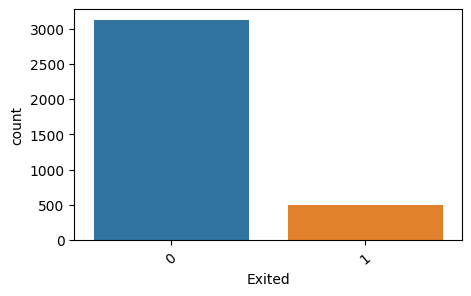

In [182]:
sns.countplot(zero_balance, x=zero_balance['Exited'])
setup_plot()

*Comment: However the proportion of the exited customers are exactly the same in the dataset which customers with zero balance.*

In [183]:
exited = df[df['Exited'] == 1]
exited.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0,1
16,653,58,1,132602.88,1,1,0,5097.67,1,0,1,1


*Comment: There are customers who have exited but still have a balance in their account.*

In [184]:
exited_balance = df[(df['Exited'] == 1) & (df['Balance'] > 0)]
exited_balance.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0,1
16,653,58,1,132602.88,1,1,0,5097.67,1,0,1,1
35,475,45,0,134264.04,1,1,0,27822.99,0,0,0,1


In [185]:
len(exited_balance)

1537

In [186]:
len(exited_balance)/len(df)*100

15.370000000000001

C:\Users\lily\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


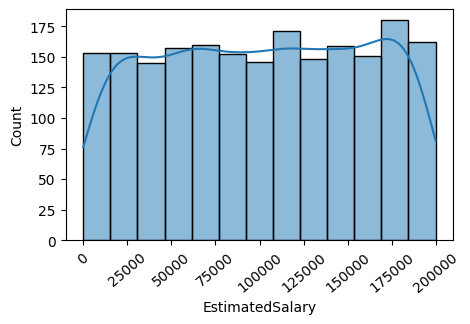

In [187]:
sns.histplot(exited, x=exited['EstimatedSalary'], kde=True)
setup_plot()

#### Train test split

In [188]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [190]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 11), (2500, 11), (7500,), (2500,))

*Comment: 11 input layers*

In [191]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

*Comment: Deep Learning methodology is sensitive to distance*

#### Build neural network & Define the layers

In [192]:
model1 = Sequential()
model1.add(InputLayer(shape=(11,))) 
model1.add(Dense(32, activation='relu'))
model1.add(Dense(32, activation='relu')) 
model1.add(Dense(1,activation='sigmoid'))

In [193]:
model1.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,473 (5.75 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile: define optimizer, the loss function, and the evaluation metrics

In [216]:
model1.compile(loss='binary_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy', tf.keras.metrics.AUC(), 'Precision', 'Recall'])

*X_train_scaled*

In [217]:
history11 = model1.fit(X_train_scaled, y_train, epochs=60, batch_size=32, validation_data=(X_test_scaled, y_test)) 

Epoch 1/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - Precision: 0.6911 - Recall: 0.4348 - accuracy: 0.8437 - auc_29: 0.8258 - loss: 0.3806 - val_Precision: 0.6553 - val_Recall: 0.5265 - val_accuracy: 0.8472 - val_auc_29: 0.8477 - val_loss: 0.3586
Epoch 2/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.7300 - Recall: 0.4659 - accuracy: 0.8566 - auc_29: 0.8498 - loss: 0.3508 - val_Precision: 0.6776 - val_Recall: 0.5285 - val_accuracy: 0.8528 - val_auc_29: 0.8555 - val_loss: 0.3506
Epoch 3/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.7167 - Recall: 0.4583 - accuracy: 0.8492 - auc_29: 0.8550 - loss: 0.3537 - val_Precision: 0.8440 - val_Recall: 0.4145 - val_accuracy: 0.8652 - val_auc_29: 0.8587 - val_loss: 0.3444
Epoch 4/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.7287 - Recall: 0.4127 - accuracy: 0.8551 - auc_29: 0.8544 - loss: 0.3444 - val_Precision: 0.8400 - val_Recall: 0.4126 - val_accuracy: 0.8644 - val_auc_29: 0.8598 - val_loss: 0.3425
Epoch 5/

In [218]:
history11 = pd.DataFrame(history11.history)
history11 

,Precision,Recall,accuracy,auc_29,loss,val_Precision,val_Recall,val_accuracy,val_auc_29,val_loss
0,0.701923,0.429974,0.846667,0.832434,0.371984,0.655257,0.526523,0.8472,0.847674,0.358644
1,0.731626,0.429974,0.851733,0.846931,0.356652,0.677582,0.528487,0.8528,0.855455,0.350561
2,0.727273,0.445026,0.852933,0.852168,0.351891,0.844000,0.414538,0.8652,0.858711,0.344353
3,0.747001,0.448298,0.856667,0.857521,0.345720,0.840000,0.412574,0.8644,0.859847,0.342498
4,0.737352,0.448298,0.855067,0.859627,0.343975,0.766990,0.465619,0.8624,0.861187,0.338577
5,0.742981,0.450262,0.856267,0.861586,0.341959,0.691358,0.550098,0.8584,0.862615,0.343434
6,0.743158,0.462042,0.857867,0.861606,0.341574,0.793333,0.467584,0.8668,0.861686,0.338659
7,0.743506,0.449607,0.856267,0.864121,0.338769,0.758410,0.487230,0.8640,0.864820,0.333651
8,0.744593,0.473168,0.859600,0.865817,0.336743,0.842975,0.400786,0.8628,0.860860,0.342714
9,0.745322,0.469241,0.859200,0.866389,0.335168,0.746269,0.491159,0.8624,0.865021,0.332855


*Comment:*

*X_train - instead of X_train scaled*

In [219]:
history12 = model1.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test)) 

Epoch 1/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.2177 - Recall: 0.2720 - accuracy: 0.6529 - auc_29: 0.5112 - loss: 14741.8203 - val_Precision: 0.2449 - val_Recall: 0.0236 - val_accuracy: 0.7864 - val_auc_29: 0.5023 - val_loss: 992.3128
Epoch 2/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.2263 - Recall: 0.2168 - accuracy: 0.6890 - auc_29: 0.5139 - loss: 886.7151 - val_Precision: 0.2371 - val_Recall: 0.2534 - val_accuracy: 0.6820 - val_auc_29: 0.5231 - val_loss: 289.5113
Epoch 3/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.2234 - Recall: 0.2278 - accuracy: 0.6711 - auc_29: 0.5089 - loss: 740.1689 - val_Precision: 0.3333 - val_Recall: 0.0020 - val_accuracy: 0.7960 - val_auc_29: 0.5005 - val_loss: 779.0005
Epoch 4/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.2245 - Recall: 0.2129 - accuracy: 0.6854 - auc_29: 0.5107 - loss: 537.8234 - val_Precision: 0.1786 - val_Recall: 0.0098 - val_accuracy: 0.7892 - val_auc_29: 0.5001 - val_loss:

In [220]:
history12 = pd.DataFrame(history12.history)
history12

,Precision,Recall,accuracy,auc_29,loss,val_Precision,val_Recall,val_accuracy,val_auc_29,val_loss
0,0.224425,0.229712,0.681333,0.513161,4434.012207,0.244898,0.023576,0.7864,0.502251,992.312805
1,0.226428,0.215314,0.690267,0.513350,710.532043,0.237132,0.253438,0.6820,0.523094,289.511292
2,0.210178,0.208115,0.679333,0.504437,636.453186,0.333333,0.001965,0.7960,0.500480,779.000549
3,0.214870,0.206152,0.684800,0.506585,465.303986,0.178571,0.009823,0.7892,0.500107,640.716248
4,0.230565,0.227094,0.688133,0.516320,460.584747,0.252471,0.552063,0.5760,0.567096,214.435120
5,0.211848,0.215314,0.676933,0.506158,374.521759,0.200000,0.001965,0.7952,0.499978,566.716980
6,0.236111,0.233639,0.689867,0.519522,458.195679,0.333333,0.001965,0.7960,0.500481,395.327911
7,0.252964,0.251309,0.696267,0.532341,375.568542,0.234990,0.715128,0.4680,0.561020,726.944824
8,0.222942,0.225131,0.682267,0.512907,385.972137,0.310000,0.121807,0.7660,0.525898,263.872131
9,0.230466,0.229712,0.686800,0.516336,430.355988,0.333333,0.001965,0.7960,0.500480,283.876465


*Comment: the model starts with better initial Validation Precision but does not improve much, indicating that history12 might generalize poorly compared to history11, seems to have more stable but consistently lower performance on both training and validation sets.*

#### Implementation of Early Stopping

*X_train_scaled*

In [221]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, restore_best_weights=True)

history2 = model1.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.3596 - Recall: 0.5923 - accuracy: 0.6734 - auc_29: 0.6887 - loss: 3.7143 - val_Precision: 0.6142 - val_Recall: 0.4067 - val_accuracy: 0.8272 - val_auc_29: 0.7990 - val_loss: 0.4710
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.6126 - Recall: 0.4610 - accuracy: 0.8260 - auc_29: 0.8046 - loss: 0.4556 - val_Precision: 0.7511 - val_Recall: 0.3261 - val_accuracy: 0.8408 - val_auc_29: 0.8091 - val_loss: 0.4212
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.6467 - Recall: 0.4627 - accuracy: 0.8361 - auc_29: 0.8143 - loss: 0.4109 - val_Precision: 0.5709 - val_Recall: 0.5855 - val_accuracy: 0.8260 - val_auc_29: 0.8325 - val_loss: 0.4000
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.6318 - Recall: 0.4853 - accuracy: 0.8369 - auc_29: 0.8280 - loss: 0.3937 - val_Precision: 0.6504 - val_Recall: 0.5226 - val_accuracy: 0.8456 - val_auc_29: 0.8386 - val_loss: 0.3701
Epoc

In [222]:
history2 = pd.DataFrame(history2.history)
history2

,Precision,Recall,accuracy,auc_29,loss,val_Precision,val_Recall,val_accuracy,val_auc_29,val_loss
0,0.431659,0.483639,0.765067,0.724873,1.593279,0.614243,0.406680,0.8272,0.798978,0.470961
1,0.614789,0.467932,0.831867,0.810737,0.431426,0.751131,0.326130,0.8408,0.809088,0.421234
2,0.652565,0.474476,0.841467,0.823403,0.395917,0.570881,0.585462,0.8260,0.832526,0.399971
3,0.656057,0.485602,0.843333,0.834772,0.379427,0.650367,0.522593,0.8456,0.838602,0.370125
4,0.676796,0.481021,0.847467,0.839458,0.368788,0.726974,0.434185,0.8516,0.835218,0.368430
5,0.685927,0.481675,0.849467,0.845102,0.362167,0.622472,0.544204,0.8400,0.838438,0.370069
6,0.689815,0.487565,0.850933,0.846048,0.359954,0.673684,0.502947,0.8492,0.841146,0.360310
7,0.699512,0.469241,0.850800,0.849556,0.355926,0.631236,0.571709,0.8448,0.844207,0.366384
8,0.693642,0.471204,0.849867,0.852192,0.352967,0.647754,0.538310,0.8464,0.841980,0.362144
9,0.705603,0.486257,0.854000,0.853501,0.349714,0.674603,0.500982,0.8492,0.843275,0.359400


*Comment: slightly overfitting as per accuracy shows.*

#### Implementation of Dropout

In [223]:
model2 = Sequential()
model2.add(InputLayer(shape=(11,))) 
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu')) 
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid'))

In [224]:
model2.compile(loss='binary_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy', tf.keras.metrics.AUC(), 'Precision', 'Recall'])

In [225]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, restore_best_weights=True)

history3 = model2.fit(X_train_scaled, y_train,
                    epochs=60,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - Precision: 0.2896 - Recall: 0.0870 - accuracy: 0.7643 - auc_30: 0.5806 - loss: 0.5374 - val_Precision: 0.7109 - val_Recall: 0.1788 - val_accuracy: 0.8180 - val_auc_30: 0.7666 - val_loss: 0.4306
Epoch 2/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.6096 - Recall: 0.1816 - accuracy: 0.8107 - auc_30: 0.7388 - loss: 0.4452 - val_Precision: 0.8120 - val_Recall: 0.1866 - val_accuracy: 0.8256 - val_auc_30: 0.7897 - val_loss: 0.4143
Epoch 3/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.6849 - Recall: 0.2070 - accuracy: 0.8245 - auc_30: 0.7761 - loss: 0.4160 - val_Precision: 0.7477 - val_Recall: 0.3143 - val_accuracy: 0.8388 - val_auc_30: 0.8109 - val_loss: 0.3979
Epoch 4/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.6926 - Recall: 0.2780 - accuracy: 0.8252 - auc_30: 0.7822 - loss: 0.4190 - val_Precision: 0.7960 - val_Recall: 0.3143 - val_accuracy: 0.8440 - val_auc_30: 0.8218 - val_loss: 0.3873
Epoch 5/

In [226]:
history3 = pd.DataFrame(history3.history)
history3 

,Precision,Recall,accuracy,auc_30,loss,val_Precision,val_Recall,val_accuracy,val_auc_30,val_loss
0,0.430657,0.077225,0.791200,0.659179,0.490097,0.710938,0.178782,0.8180,0.766577,0.430588
1,0.608108,0.176702,0.809067,0.739624,0.445565,0.811966,0.186640,0.8256,0.789731,0.414314
2,0.675624,0.230366,0.820667,0.768080,0.427551,0.747664,0.314342,0.8388,0.810883,0.397878
3,0.685848,0.288613,0.828133,0.779347,0.416588,0.796020,0.314342,0.8440,0.821820,0.387287
4,0.699430,0.321335,0.833600,0.794717,0.404133,0.796296,0.337917,0.8476,0.833556,0.373770
5,0.711111,0.356021,0.839333,0.801954,0.396469,0.787149,0.385069,0.8536,0.843390,0.363566
6,0.711392,0.367801,0.840800,0.818087,0.383245,0.793478,0.430255,0.8612,0.852656,0.351072
7,0.701956,0.399215,0.843067,0.822654,0.377967,0.815686,0.408644,0.8608,0.857042,0.348142
8,0.717979,0.399869,0.845733,0.831812,0.368937,0.802120,0.445973,0.8648,0.861360,0.340519
9,0.716435,0.405105,0.846133,0.833350,0.368280,0.783871,0.477407,0.8668,0.863495,0.339499


*Comment: Implementation of dropout is not much improving the model's performance at this stage, however slightly increased.*

#### Implementation of regularization

In [227]:
model3 = Sequential()
model3.add(InputLayer(shape=(11,))) 
model3.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model3.add(Dropout(0.2))
model3.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001))) 
model3.add(Dropout(0.2))
model3.add(Dense(1,activation='sigmoid'))

model3.compile(loss='binary_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy', tf.keras.metrics.AUC(), 'Precision', 'Recall'])

In [228]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, restore_best_weights=True)

history4 = model3.fit(X_train_scaled, y_train,
                    epochs=60,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Precision: 0.2170 - Recall: 0.0518 - accuracy: 0.7627 - auc_31: 0.4934 - loss: 0.6105 - val_Precision: 0.8103 - val_Recall: 0.0923 - val_accuracy: 0.8108 - val_auc_31: 0.7647 - val_loss: 0.4745
Epoch 2/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.5993 - Recall: 0.1396 - accuracy: 0.8025 - auc_31: 0.7426 - loss: 0.4855 - val_Precision: 0.7647 - val_Recall: 0.1788 - val_accuracy: 0.8216 - val_auc_31: 0.8041 - val_loss: 0.4378
Epoch 3/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.6766 - Recall: 0.2370 - accuracy: 0.8234 - auc_31: 0.7740 - loss: 0.4513 - val_Precision: 0.7521 - val_Recall: 0.3576 - val_accuracy: 0.8452 - val_auc_31: 0.8301 - val_loss: 0.4148
Epoch 4/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.6658 - Recall: 0.2714 - accuracy: 0.8208 - auc_31: 0.7793 - loss: 0.4500 - val_Precision: 0.8345 - val_Recall: 0.2279 - val_accuracy: 0.8336 - val_auc_31: 0.8386 - val_loss: 0.4066
Epoch 5/

In [229]:
history4 = pd.DataFrame(history4.history)
history4

,Precision,Recall,accuracy,auc_31,loss,val_Precision,val_Recall,val_accuracy,val_auc_31,val_loss
0,0.310976,0.033377,0.788000,0.590549,0.558391,0.810345,0.092338,0.8108,0.764744,0.474526
1,0.618582,0.165576,0.809200,0.748499,0.476362,0.764706,0.178782,0.8216,0.804148,0.437806
2,0.662455,0.240183,0.820267,0.775764,0.453766,0.752066,0.357564,0.8452,0.830121,0.414846
3,0.652374,0.278796,0.822800,0.792893,0.437247,0.834532,0.227898,0.8336,0.838619,0.406609
4,0.718518,0.317408,0.835600,0.804600,0.425450,0.834197,0.316306,0.8480,0.847634,0.390560
5,0.715686,0.334424,0.837333,0.814621,0.412362,0.799257,0.422397,0.8608,0.858209,0.378405
6,0.711801,0.375000,0.841733,0.821298,0.405525,0.791971,0.426326,0.8604,0.861209,0.370976
7,0.723039,0.386126,0.844800,0.826099,0.398271,0.806228,0.457760,0.8672,0.864387,0.362985
8,0.731170,0.412958,0.849467,0.835310,0.389228,0.864629,0.388998,0.8632,0.866551,0.363075
9,0.732203,0.424084,0.851067,0.836009,0.385951,0.828996,0.438114,0.8672,0.869232,0.356037


*Comment: val_auc has increased a bit, but val_loss increased - all in all similar performance.*

### Hyperparameter tuning

#### Hyperband - No of neuron, Dropout, learning rate to be tuned

In [240]:
def build_model(hp):
    model5 = Sequential()
    model5.add(InputLayer(shape=(11,))) 
    model5.add(Dense(hp.Int('units_1', min_value=32, max_value=256, step=32), activation='relu'))
    model5.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    model5.add(Dense(hp.Int('units_2', min_value=32, max_value=256, step=32), activation='relu'))
    model5.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    model5.add(Dense(1, activation='sigmoid'))

    model5.compile(optimizer=Adam(hp.Float('learning_rate', 1e-5, 1e-2, sampling='LOG')),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(), 'Precision', 'Recall'])
    return model5

tuner = kt.Hyperband(build_model,
                     objective='val_auc',
                     max_epochs=50,
                     factor=3,
                     directory='C:/Users/Lily/Documents/keras_tuner',
                     project_name='Churn_ANN')

tuner.search(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

Reloading Tuner from C:/Users/Lily/Documents/keras_tuner\Churn_ANN\tuner0.json


In [241]:
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
print(f'Best val_auc: {best_trial.metrics.get_last_value("val_auc")}')

best_learning_rate = best_hyperparameters.get('learning_rate')
best_units_1 = best_hyperparameters.get('units_1')
best_units_2 = best_hyperparameters.get('units_2')
best_dropout_rate_1 = best_hyperparameters.get('dropout_rate')
best_dropout_rate_2 = best_hyperparameters.get('dropout_rate') 

print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Number of Neurons in First Hidden Layer: {best_units_1}")
print(f"Best Number of Neurons in Second Hidden Layer: {best_units_2}")
print(f"Best Dropout Rate: {best_dropout_rate_1}")
print(f"Best Dropout Rate: {best_dropout_rate_2}")

Best val_auc: 0.5678554773330688
Best Learning Rate: 0.009201323084426621
Best Number of Neurons in First Hidden Layer: 64
Best Number of Neurons in Second Hidden Layer: 32
Best Dropout Rate: 0.2
Best Dropout Rate: 0.2


*Comment:This drop suggests that the hyperparameter search may not have found an optimal configuration for the model. Therefore will continue the tuning with the original parameter settings.*

#### Hyperpatameter tuning on activation functions

In [246]:
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 200],
}

In [247]:
best_val_loss = float('inf')
best_params = {}

In [248]:
for params in ParameterGrid(param_grid):
    model4 = Sequential()
    model4.add(InputLayer(shape=(11,))) 
    model4.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    model4.add(Dropout(0.2))
    model4.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    model4.add(Dropout(0.2))
    model4.add(Dense(1, activation='sigmoid'))
    
    model4.compile(loss='binary_crossentropy', 
                  optimizer='Adam', 
                  metrics=['accuracy', tf.keras.metrics.AUC(), 'Precision', 'Recall'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, restore_best_weights=True)
    
    history5 = model4.fit(X_train_scaled, y_train,
                          epochs=params['epochs'],
                          batch_size=params['batch_size'],
                          validation_data=(X_test_scaled, y_test),
                          callbacks=[early_stopping],
                          verbose=1)

val_loss = min(history5.history['val_loss'])
    
if val_loss < best_val_loss:
    best_val_loss = val_loss
    best_params = params

print(f"Best Validation Loss: {best_val_loss}")
print(f"Best Parameters: {best_params}")

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - Precision: 0.2467 - Recall: 0.0800 - accuracy: 0.7643 - auc_29: 0.5938 - loss: 0.5295 - val_Precision: 0.6378 - val_Recall: 0.2456 - val_accuracy: 0.8180 - val_auc_29: 0.7926 - val_loss: 0.4217
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.6453 - Recall: 0.2428 - accuracy: 0.8174 - auc_29: 0.7555 - loss: 0.4423 - val_Precision: 0.6394 - val_Recall: 0.3379 - val_accuracy: 0.8264 - val_auc_29: 0.8139 - val_loss: 0.4063
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.6618 - Recall: 0.2876 - accuracy: 0.8206 - auc_29: 0.7825 - loss: 0.4245 - val_Precision: 0.8159 - val_Recall: 0.3222 - val_accuracy: 0.8472 - val_auc_29: 0.8346 - val_loss: 0.3804
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.6972 - Recall: 0.3134 - accuracy: 0.8403 - auc_29: 0.7958 - loss: 0.3943 - val_Precision: 0.7835 - val_Recall: 0.4479 - val_accuracy: 0.8624 - val_auc_29: 0.8540 - val_loss: 0.3575
Epoch 5/

In [245]:
model42 = Sequential()
model42.add(InputLayer(shape=(11,))) 
model42.add(Dense(34, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model42.add(Dropout(0.2))
model42.add(Dense(34, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model42.add(Dropout(0.2))
model42.add(Dense(1, activation='sigmoid'))
    
model42.compile(loss='binary_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy', tf.keras.metrics.AUC(), 'Precision', 'Recall'])
    
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, restore_best_weights=True)
    
history6 = model42.fit(X_train_scaled, y_train,
                       epochs=200,
                       batch_size=64,
                       validation_data=(X_test_scaled, y_test),
                       callbacks=[early_stopping],
                       verbose=1)

Epoch 1/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - Precision: 0.2263 - Recall: 0.4138 - accuracy: 0.5830 - auc_28: 0.5445 - loss: 0.6613 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7964 - val_auc_28: 0.6963 - val_loss: 0.4745
Epoch 2/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.7342 - Recall: 0.0402 - accuracy: 0.7910 - auc_28: 0.6883 - loss: 0.4867 - val_Precision: 0.7397 - val_Recall: 0.1061 - val_accuracy: 0.8104 - val_auc_28: 0.7766 - val_loss: 0.4310
Epoch 3/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.6883 - Recall: 0.1591 - accuracy: 0.8132 - auc_28: 0.7427 - loss: 0.4486 - val_Precision: 0.7692 - val_Recall: 0.2161 - val_accuracy: 0.8272 - val_auc_28: 0.8051 - val_loss: 0.4106
Epoch 4/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.7012 - Recall: 0.2362 - accuracy: 0.8168 - auc_28: 0.7589 - loss: 0.4462 - val_Precision: 0.7711 - val_Recall: 0.3045 - val_accuracy: 0.8400 - val_auc_28: 0.8223 - val_loss: 0.

In [236]:
history6 = pd.DataFrame(history6.history)
history6

,Precision,Recall,accuracy,auc_28,loss,val_Precision,val_Recall,val_accuracy,val_auc_28,val_loss
0,0.369369,0.053665,0.788533,0.649448,0.581275,0.760000,0.149312,0.8172,0.781304,0.497100
1,0.654945,0.195026,0.815067,0.756133,0.499738,0.807947,0.239686,0.8336,0.814115,0.452903
2,0.681373,0.272906,0.825867,0.786440,0.464395,0.811429,0.278978,0.8400,0.830367,0.428262
3,0.725105,0.338351,0.839067,0.805099,0.440381,0.770609,0.422397,0.8568,0.845920,0.403500
4,0.719497,0.374346,0.842800,0.821070,0.421878,0.773649,0.449902,0.8612,0.858135,0.387018
5,0.741697,0.394634,0.848667,0.826276,0.411396,0.781145,0.455796,0.8632,0.862795,0.379302
6,0.722795,0.412958,0.848133,0.838812,0.397086,0.772727,0.467584,0.8636,0.863623,0.370248
7,0.742791,0.421466,0.852400,0.845148,0.389196,0.755418,0.479371,0.8624,0.863565,0.370255
8,0.763615,0.431283,0.856933,0.841752,0.387349,0.750725,0.508841,0.8656,0.867359,0.362840
9,0.742188,0.435209,0.854133,0.841581,0.385632,0.785479,0.467584,0.8656,0.869330,0.360419


*The best model was model3, with val_auc_31 as of 0.873.*

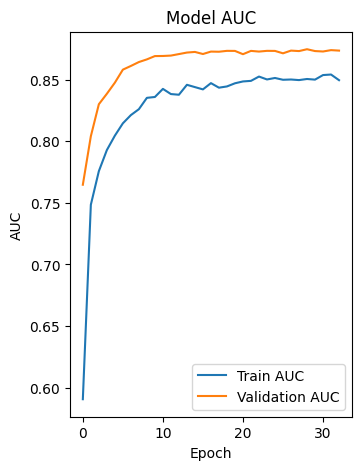

In [250]:
plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
plt.plot(history4['auc_31'], label='Train AUC')
plt.plot(history4['val_auc_31'], label='Validation AUC')
plt.title('Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()